In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
from pylab import rcParams
dataFrame = pd.read_csv('vara_2.csv', sep=None, engine='python',usecols=range(21,23))

In [2]:
dataFrame = dataFrame.dropna(how='any') 

In [3]:
#EPSG 3301
x_3301 = dataFrame[dataFrame.columns[0:1]]
y_3301 = dataFrame[dataFrame.columns[1:2]]
x_3301_list = []
y_3301_list = []

for index, row in x_3301.iterrows():
    x1 = int(row["Lest_X"].split('-')[0])
    x_3301_list.append(x1)
    
for index, row in y_3301.iterrows():
    y1 = int(row["Lest_Y"].split('-')[0])
    y_3301_list.append(y1)

In [4]:
from pyproj import Proj, transform

x2_list = []
y2_list = []

inProj = Proj(init='epsg:3301') #4258
outProj = Proj(init='epsg:4326')
for x1, y1 in zip(y_3301_list,x_3301_list,):
    x2,y2 = transform(inProj,outProj,x1,y1)
    x2_list.append(x2)
    y2_list.append(y2)
    #print(x2,y2)

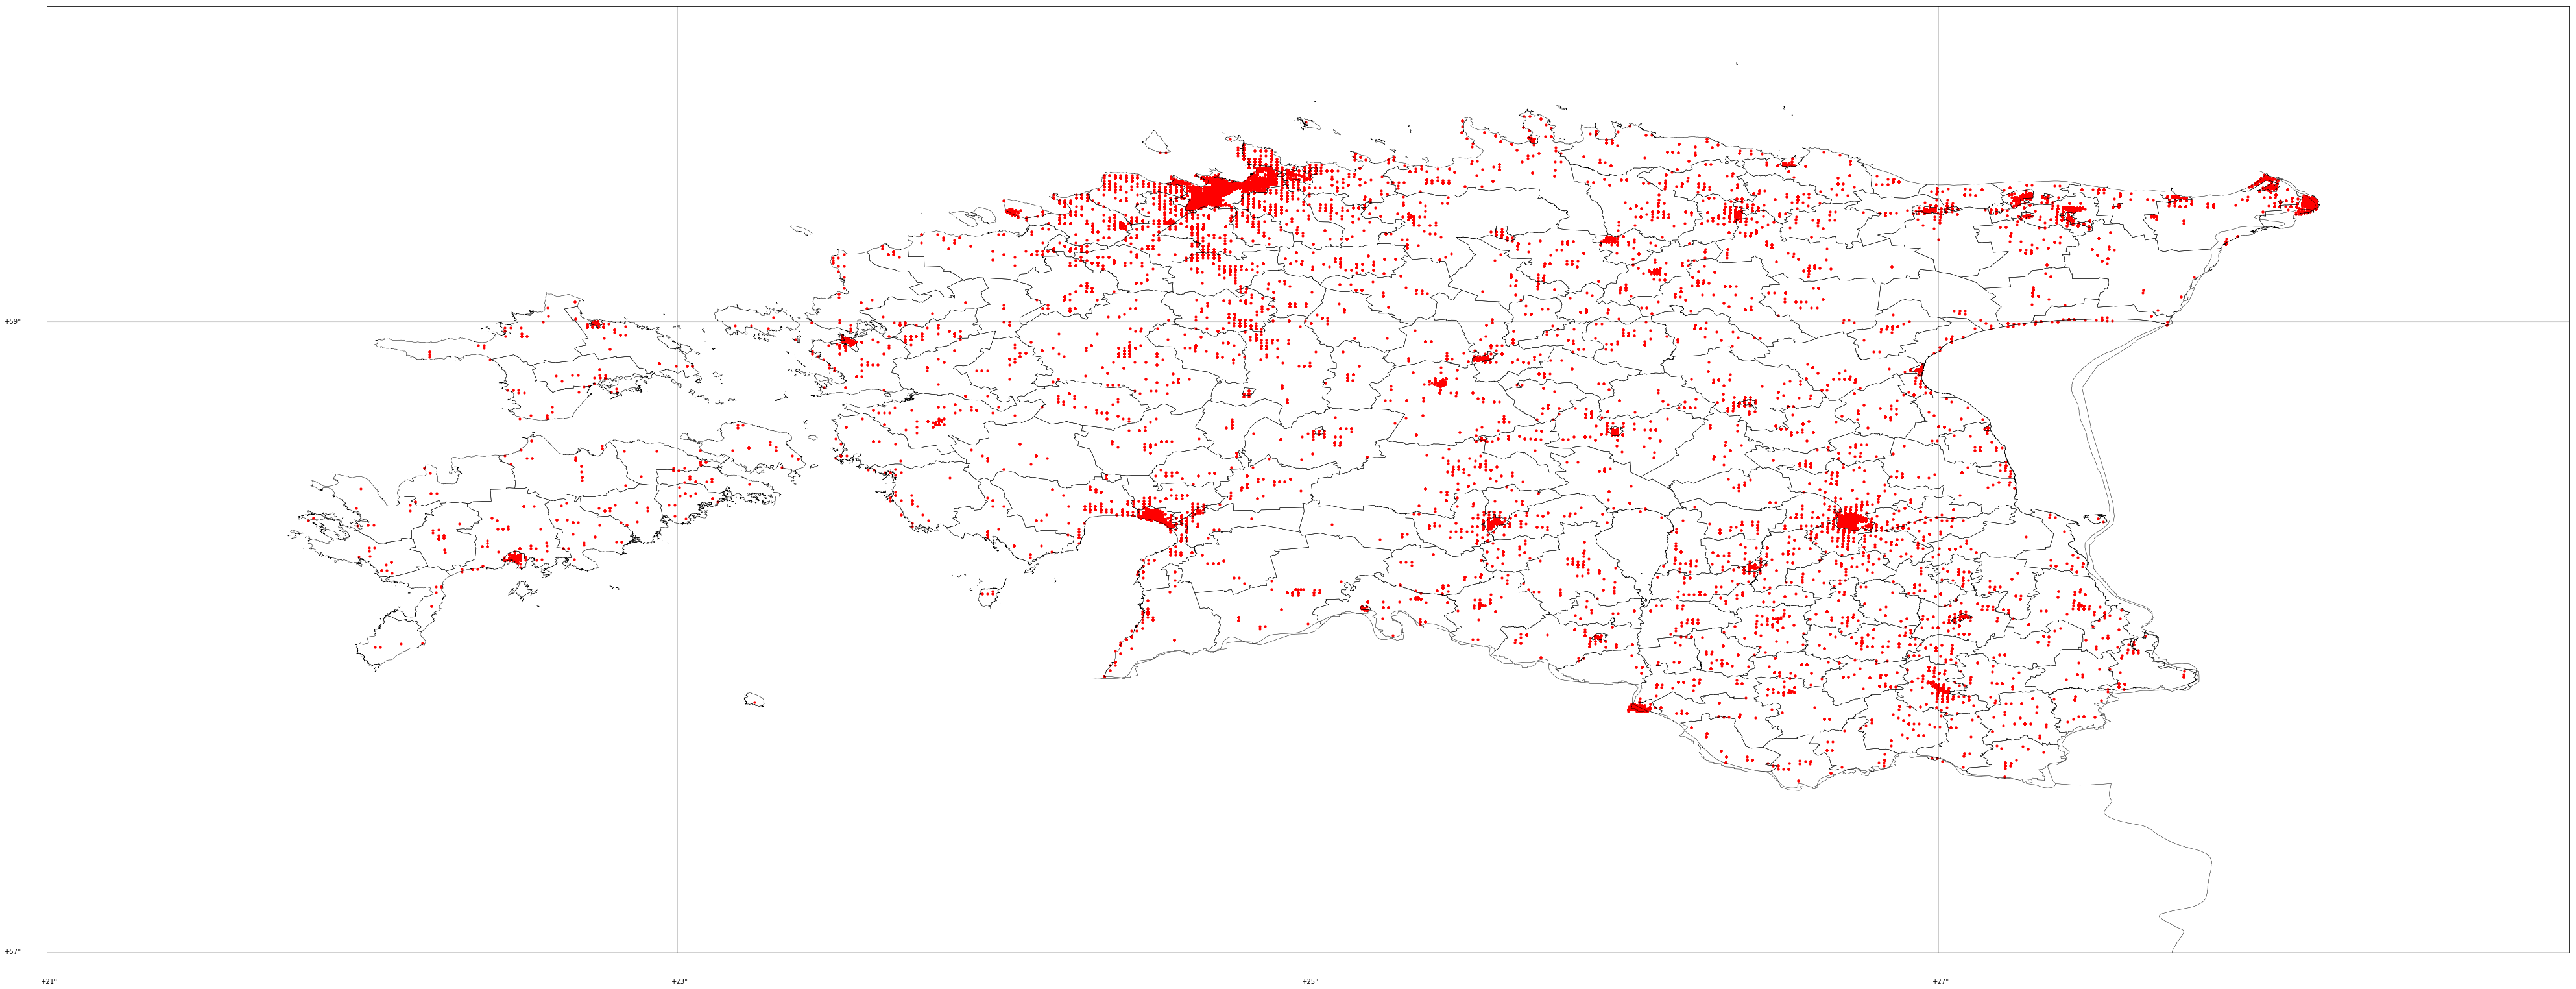

In [9]:
import matplotlib as mpl
#mpl.rcParams['font.size'] = 10.
#mpl.rcParams['axes.labelsize'] = 8.
#mpl.rcParams['xtick.labelsize'] = 6.
#mpl.rcParams['ytick.labelsize'] = 6.
 
fig = plt.figure(figsize=(60,40))

plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

# Estonia's coordinates
x1 = 21.
x2 = 29.
y1 = 57.
y2 = 60.
    
m = Basemap(resolution='f', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2,epsg=4326)
m.drawcountries(linewidth=0.5)
#m.drawcoastlines(linewidth=0.5)

m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians

#m.readshapefile("borders/gadm36_EST_0", "0") # Piir
#m.readshapefile("borders/gadm36_EST_1", "1") # Maakond
m.readshapefile("borders/gadm36_EST_2", "2")  # Vallad
#m.readshapefile("borders/gadm36_EST_3", "3") # Muu

x, y = m(x2_list, y2_list)  # transform coordinates
plt.scatter(x, y, 10, marker='o', color='Red') 
#plt.savefig("Kaart_maakondadega.jpg")
plt.savefig("Kaart_valdadega.jpg")
plt.show()